In [1]:
# Import necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve,plot_confusion_matrix,classification_report

In [2]:
# import dataset
df1 = pd.read_csv('penguins_size.csv')
df = df1.drop('Unnamed: 0',axis = 1)
df.head( )

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# find out null values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# Drop null values

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Exploratory Data Analysis

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df[df['species'] == 'Gentoo'].groupby('sex').describe()

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
.                   1.0  44.500000       NaN  44.5  44.50  44.5  44.500  44.5   
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
.                  1.0  15.700000  ...             217.0  217.0         1.0   
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
.       4875.000000         NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 32 columns]

In [13]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [14]:
df.at[336,'sex'] = 'FEMALE'

In [15]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [16]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# Data Visualization

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

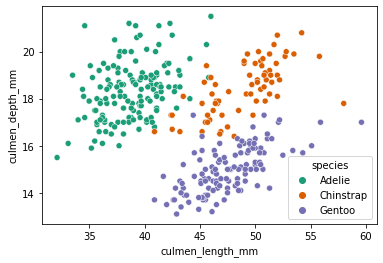

In [18]:
sns.scatterplot(x = 'culmen_length_mm',  y = 'culmen_depth_mm', data = df, hue = 'species', palette = 'Dark2')

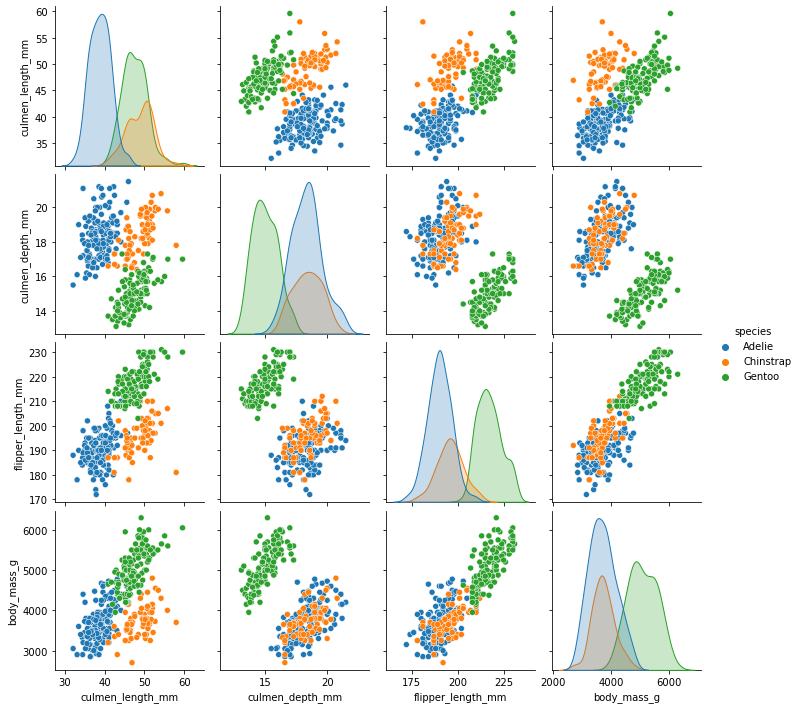

In [19]:
sns.pairplot(df, hue = 'species')

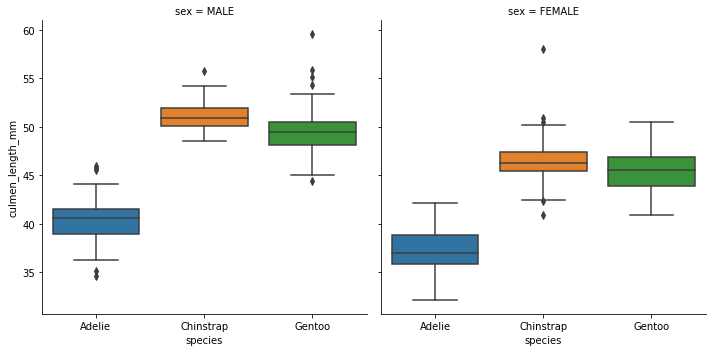

In [20]:
sns.catplot(x = 'species', y = 'culmen_length_mm', col = 'sex', data = df, kind = 'box')

In [17]:
# Ordinary Encoding Technique
df['sex']=df['sex'].map({'FEMALE':0,'MALE':1})
df['island']=df['island'].map({'Torgersen':0,'Biscoe':1,'Dream':2}) 

In [18]:
df['sex']

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 334, dtype: int64

In [19]:
X = df.drop(columns=['species'])
y = df['species']

In [20]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,1
1,0,39.5,17.4,186.0,3800.0,0
2,0,40.3,18.0,195.0,3250.0,0
4,0,36.7,19.3,193.0,3450.0,0
5,0,39.3,20.6,190.0,3650.0,1


In [21]:
scalar = StandardScaler()

In [22]:
x_scaled = scalar.fit_transform(X)

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,test_size = .25 , random_state = 30 )

In [24]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [25]:
y_pred = naive_bayes.predict(x_test)

In [26]:
y_pred

array(['Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', '

In [28]:
accuracy_score(y_test, y_pred)

0.8333333333333334

In [30]:
naive_bayes.score(x_test,y_test)

0.8333333333333334

In [31]:
naive_bayes.score(x_train,y_train)

0.836

In [109]:
confusion_matrix(y_test, y_pred)

array([[28, 13,  1],
       [ 0, 17,  0],
       [ 0,  0, 25]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


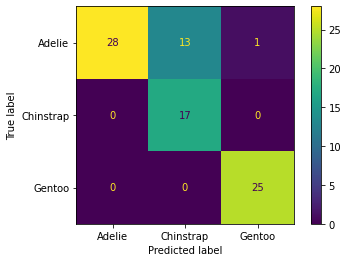

In [110]:
plot_confusion_matrix(naive_bayes, x_test, y_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.52      0.69        42
   Chinstrap       0.55      1.00      0.71        17
      Gentoo       0.81      1.00      0.89        25

    accuracy                           0.76        84
   macro avg       0.78      0.84      0.76        84
weighted avg       0.85      0.76      0.75        84

